 Xây dựng mô hình dựa vào lexicon (từ điển cảm xúc) để dự đoán sentiment của review (Positive, Negative, Neutral).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('/content/data_file.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment,polarity,length,word_counts
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",not much write exactly supposed filter pop sou...,Positive,0.3500,154,25
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable not realized ...,Positive,0.0000,337,54
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive,0.1675,296,45
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive,0.4250,169,23
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive,0.8000,114,18


In [ ]:
df.describe()

,overall,unixReviewTime,polarity,length,word_counts
count,10261.000000,1.026100e+04,10261.000000,10261.000000,10261.000000
mean,4.488744,1.360606e+09,0.283765,308.750901,48.229412
std,0.894642,3.779735e+07,0.198325,376.318391,57.312309
min,1.000000,1.095466e+09,-0.800000,12.000000,2.000000
25%,4.000000,1.343434e+09,0.156845,114.000000,18.000000
50%,5.000000,1.368490e+09,0.267949,187.000000,30.000000
75%,5.000000,1.388966e+09,0.400000,345.000000,54.000000
max,5.000000,1.405987e+09,1.000000,7233.000000,1112.000000


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()

# Tính điểm sentiment
df['vader_score'] = df['reviews'].apply(lambda x: vader.polarity_scores(str(x))['compound'])

# Gán nhãn dự đoán từ mô hình
def get_vader_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['vader_sentiment'] = df['vader_score'].apply(get_vader_sentiment)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


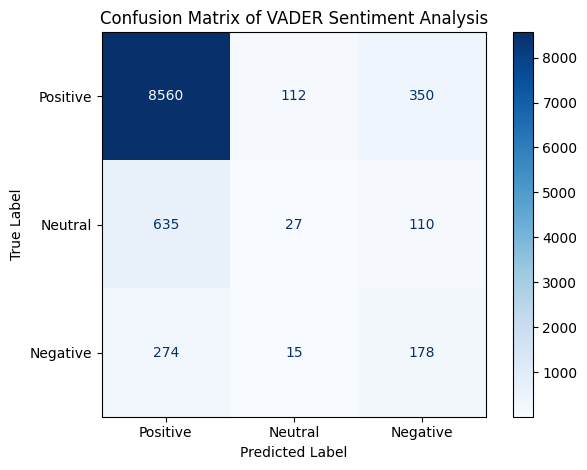

Confusion Matrix:
[[ 178   15  274]
 [ 110   27  635]
 [ 350  112 8560]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.28      0.38      0.32       467
     Neutral       0.18      0.03      0.06       772
    Positive       0.90      0.95      0.93      9022

    accuracy                           0.85     10261
   macro avg       0.45      0.45      0.44     10261
weighted avg       0.82      0.85      0.83     10261



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Tính confusion matrix
cm = confusion_matrix(df['sentiment'], df['vader_sentiment'], labels=["Positive", "Neutral", "Negative"])

# Hiển thị confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Neutral", "Negative"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of VADER Sentiment Analysis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

print("Confusion Matrix:")
print(confusion_matrix(df['sentiment'], df['vader_sentiment']))



print("\nClassification Report:")
print(classification_report(df['sentiment'], df['vader_sentiment']))


Naive Bayes

🔁 Stratified K-Fold with Balanced Dataset:

🔁 Fold 1
Accuracy: 0.8859
              precision    recall  f1-score   support

    Negative     0.9099    0.9402    0.9248      1805
     Neutral     0.8438    0.8986    0.8703      1804
    Positive     0.9079    0.8188    0.8611      1805

    accuracy                         0.8859      5414
   macro avg     0.8872    0.8859    0.8854      5414
weighted avg     0.8872    0.8859    0.8854      5414

Confusion Matrix:
[[1697   70   38]
 [  71 1621  112]
 [  97  230 1478]]

🔁 Fold 2
Accuracy: 0.8921
              precision    recall  f1-score   support

    Negative     0.9089    0.9462    0.9272      1804
     Neutral     0.8481    0.9102    0.8781      1804
    Positive     0.9256    0.8199    0.8696      1805

    accuracy                         0.8921      5413
   macro avg     0.8942    0.8921    0.8916      5413
weighted avg     0.8942    0.8921    0.8916      5413

Confusion Matrix:
[[1707   65   32]
 [  75 1642   87]
 [  96  229 14

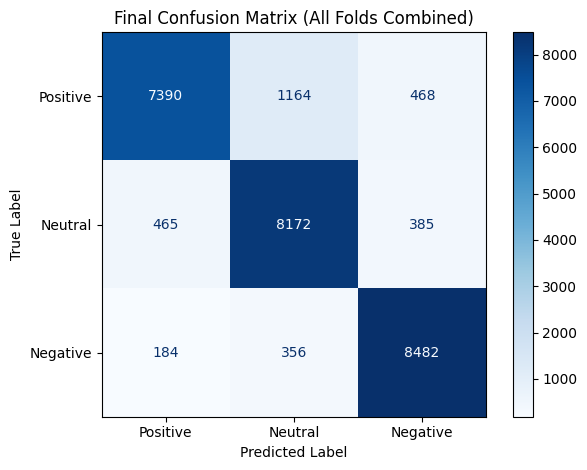

📊 FINAL REPORT ON ALL FOLDS:
Accuracy: 0.8883470958250094
              precision    recall  f1-score   support

    Negative     0.9086    0.9401    0.9241      9022
     Neutral     0.8432    0.9058    0.8734      9022
    Positive     0.9193    0.8191    0.8663      9022

    accuracy                         0.8883     27066
   macro avg     0.8904    0.8883    0.8879     27066
weighted avg     0.8904    0.8883    0.8879     27066

Confusion Matrix:
[[8482  356  184]
 [ 385 8172  465]
 [ 468 1164 7390]]


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Giả sử bạn đã có:
# X_tfidf: đặc trưng đầu vào sau khi vector hóa
# y: nhãn cảm xúc
# Chuyển văn bản thành dạng vector
vectorizer = TfidfVectorizer(max_features=5000)  # hoặc điều chỉnh số lượng đặc trưng nếu cần
X_tfidf = vectorizer.fit_transform(df['reviews'].astype(str))

# Nhãn tương ứng
y = df['sentiment']  # hoặc df['vader_sentiment'] nếu bạn dùng nhãn dự đoán

# Cân bằng lớp bằng RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X_tfidf, y)

# Khởi tạo mô hình và KFold
model = MultinomialNB()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
all_preds = []
all_true = []

print("🔁 Stratified K-Fold with Balanced Dataset:\n")

for fold, (train_index, test_index) in enumerate(skf.split(X_balanced, y_balanced), 1):
    X_train, X_test = X_balanced[train_index], X_balanced[test_index]
    y_train, y_test = y_balanced[train_index], y_balanced[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    all_preds.extend(y_pred)
    all_true.extend(y_test)

    print(f"🔁 Fold {fold}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()

# Tạo confusion matrix
final_cm = confusion_matrix(all_true, all_preds, labels=["Positive", "Neutral", "Negative"])

# Hiển thị confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=final_cm, display_labels=["Positive", "Neutral", "Negative"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Final Confusion Matrix (All Folds Combined)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()




# Báo cáo tổng thể
print("📊 FINAL REPORT ON ALL FOLDS:")
print(f"Accuracy: {np.mean(accuracies)}")
print(classification_report(all_true, all_preds, digits=4))
print("Confusion Matrix:")
print(confusion_matrix(all_true, all_preds))
